# EDA(탐색적 데이터 분석)

## Library

In [0]:
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip

     | 481kB 6.9MB/s
  Running setup.py bdist_wheel for tqdm ... - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-9kjhar18/wheels/41/18/ee/d5dd158441b27965855b1bbae03fa2d8a91fe645c01b419896
Successfully built tqdm
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
pymc3 3.6 has requirement joblib<0.13.0, but you'll have joblib 0.13.0 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
from google.colab import drive 


drive.mount('/content/gdrive')	

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False

## 한글 폰트 문제해결

In [3]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정 파일 위치: ', mpl.matplotlib_fname())

버전:  2.1.2
설치 위치:  /usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py
설정 위치:  /root/.config/matplotlib
캐시 위치:  /root/.cache/matplotlib
설정 파일 위치:  /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/matplotlibrc


In [4]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 16
['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/tr

In [5]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 110851 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


### 폰트 설정

In [6]:
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()


Python 3.6.7
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [7]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=18).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


### 폰트 크기 설정

In [0]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE )    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Preprocessing

In [9]:
prod = pd.read_csv('gdrive/My Drive/공모전/Lpoint/data/Pruduct.csv')
mast = pd.read_csv('gdrive/My Drive/공모전/Lpoint/data/Master.csv')
sess = pd.read_csv('gdrive/My Drive/공모전/Lpoint/data/Session.csv')
# sear = pd.read_csv('gdrive/My Drive/공모전/Lpoint/data/Search1.csv')
cust = pd.read_csv('gdrive/My Drive/공모전/Lpoint/data/Custom.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### 자료형 변환
- **object** to **integer**

In [10]:
prod['PD_BUY_AM'] = pd.to_numeric(prod['PD_BUY_AM'].str.replace(',',''))
prod['PD_BUY_CT'][29649] = 1440
prod['PD_BUY_CT'][34105] = 1387
prod['PD_BUY_CT'] = pd.to_numeric(prod['PD_BUY_CT'])

sess['TOT_SESS_HR_V'] = pd.to_numeric(sess['TOT_SESS_HR_V'].str.replace(',',''))
# sess['SESS_HR_PAG_VIEW'] = sess['TOT_SESS_HR_V'] / sess['TOT_PAG_VIEW_CT']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### 브랜드명 수정
- 브랜드명에서 **불필요한 단어** 제거(예. 향수, 괄호, 공백 등)
- **잘못입력된** 브랜드명 수정

In [0]:
prod['PD_BRA_NM'] = prod['PD_BRA_NM'].map(lambda x: x.split('(')[0].replace('[','').replace(']','').replace(' ',''))
prod.loc[prod['PD_BRA_NM']=='MADE IN ITALY','PD_BRA_NM'] = 'V73'
prod.loc[prod['PD_BRA_NM'].isin(['1909535','19330640825']),'PD_BRA_NM'] = 'KL'
prod.loc[prod['PD_BRA_NM']=='19386640906','PD_BRA_NM'] = '지이크'
prod.loc[prod['PD_BRA_NM'].isin(['1907517','1924113','1906469','1906471','1902295','1908178','1881326','1924116','1906492','1902287']),'PD_BRA_NM'] = 'CC collect'
prod.loc[prod['PD_BRA_NM'].isin(['19379580904','19364580830','1872892','1898551','18703070925','19359410830']),'PD_BRA_NM'] = '더아이잗'
prod.loc[prod['PD_BRA_NM'].isin(['1904418','1896342']),'PD_BRA_NM'] = '보니스팍스'
prod.loc[prod['PD_BRA_NM'].isin(['1912506','1912518']),'PD_BRA_NM'] = '리스트'
prod.loc[prod['PD_BRA_NM']=='19326280823','PD_BRA_NM'] = 'ENC'
prod.loc[prod['PD_BRA_NM'].isin(['19266920905','19266920905','19266920905']),'PD_BRA_NM'] = '요하넥스'
prod.loc[prod['PD_BRA_NM']=='1913802','PD_BRA_NM'] = '꼼빠니아'
prod.loc[prod['PD_BRA_NM']=='1917759','PD_BRA_NM'] = '인디안'

In [0]:
prod_mast = pd.merge(prod, mast, how = 'inner', on=['PD_C'])

In [0]:
a = prod_mast.groupby(['CLAC1_NM'])['PD_BUY_AM'].sum().sort_values(ascending=False).reset_index()
a.to_excel('gdrive/My Drive/공모전/Lpoint/EDA/상품군매출순위.xlsx')

In [0]:



# df[df['PD_BUY_CT']>=150000].sort_values(by=['PD_BUY_AM'],ascending=False)
cate_list= ['패션잡화','여성의류','화장품/뷰티케어','남성의류']
prod_mast = prod_mast[prod_mast['CLAC1_NM'].isin(cate_list)]

#### 명품브랜드만 골라내기

In [13]:
mp1 = pd.read_csv("gdrive/My Drive/공모전/Lpoint/명품 골라내기/lotte_luxury_list.csv")
brand_lotte = list(mp1['BRA_NM'])
mp2 = pd.read_csv('gdrive/My Drive/공모전/Lpoint/명품 골라내기/my_luxury_list.csv')
brands = brand_lotte
brands.extend(mp2['title'])
brands = list(set(brands))
len(brands)

463

In [33]:
prod_mast = prod_mast[prod_mast['PD_BRA_NM'].isin(brands)]
prod_mast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651270 entries, 0 to 5024890
Data columns (total 12 columns):
CLNT_ID      651270 non-null int64
SESS_ID      651270 non-null int64
HITS_SEQ     651270 non-null int64
PD_C         651270 non-null int64
PD_ADD_NM    651270 non-null object
PD_BRA_NM    651270 non-null object
PD_BUY_AM    651270 non-null int64
PD_BUY_CT    651270 non-null int64
PD_NM        651270 non-null object
CLAC1_NM     651270 non-null object
CLAC2_NM     651270 non-null object
CLAC3_NM     651270 non-null object
dtypes: int64(6), object(6)
memory usage: 64.6+ MB


#### 다른 데이터와 결합하기

In [0]:
pmc = pd.merge(prod_mast, cust, how = 'left', on=['CLNT_ID'])
pms = pd.merge(pmc, sess, how = 'inner', on=['CLNT_ID','SESS_ID'])

### 파일만들기

In [0]:
pmc['sales'] = pmc['PD_BUY_CT']*pmc['PD_BUY_AM']

In [0]:
a = pmc.groupby(['PD_BRA_NM'])['sales'].sum().sort_values(ascending=False).reset_index()[:10]
a.to_excel('gdrive/My Drive/공모전/Lpoint/EDA/명품top10.xlsx')

In [0]:
tot_sales = sum(pmc['sales'])

In [0]:
lux_sales = sum(pmc['sales'])

In [39]:
round(lux_sales/tot_sales*100,3)

53.23

## EDA

### 데이터의 분포를 알아보자

In [0]:
dataset = pd.read_csv("gdrive/My Drive/공모전/Lpoint/데이터셋 만들기/mlotte_drama.csv")
dataset.head()

In [0]:
dataset['month'] = dataset['LABEL'].map(lambda x : x.split('_')[0])
dataset['brand'] = dataset['LABEL'].map(lambda x : x.split('_')[1])

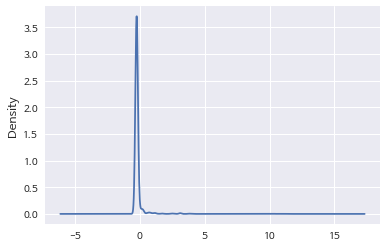

In [18]:
dataset[dataset['CLAC1_NM']=='화장품/뷰티케어']['BRA_SC'].plot.density()

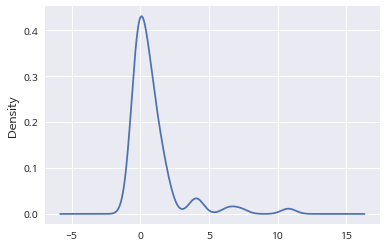

In [0]:
dataset[dataset['CLAC1_NM']=='여성의류']['BRA_SC'].plot.density()

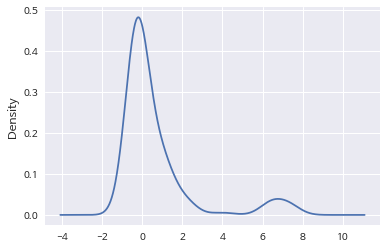

In [0]:
dataset[dataset['CLAC1_NM']=='남성의류']['BRA_SC'].plot.density()

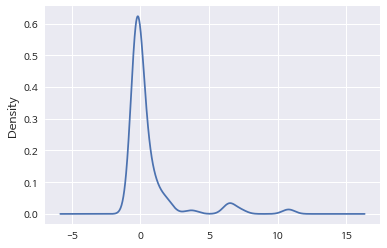

In [0]:
dataset[dataset['CLAC1_NM']=='패션잡화']['BRA_SC'].plot.density()

### Q. 명품 중 가장 선호하는 카테고리는? 

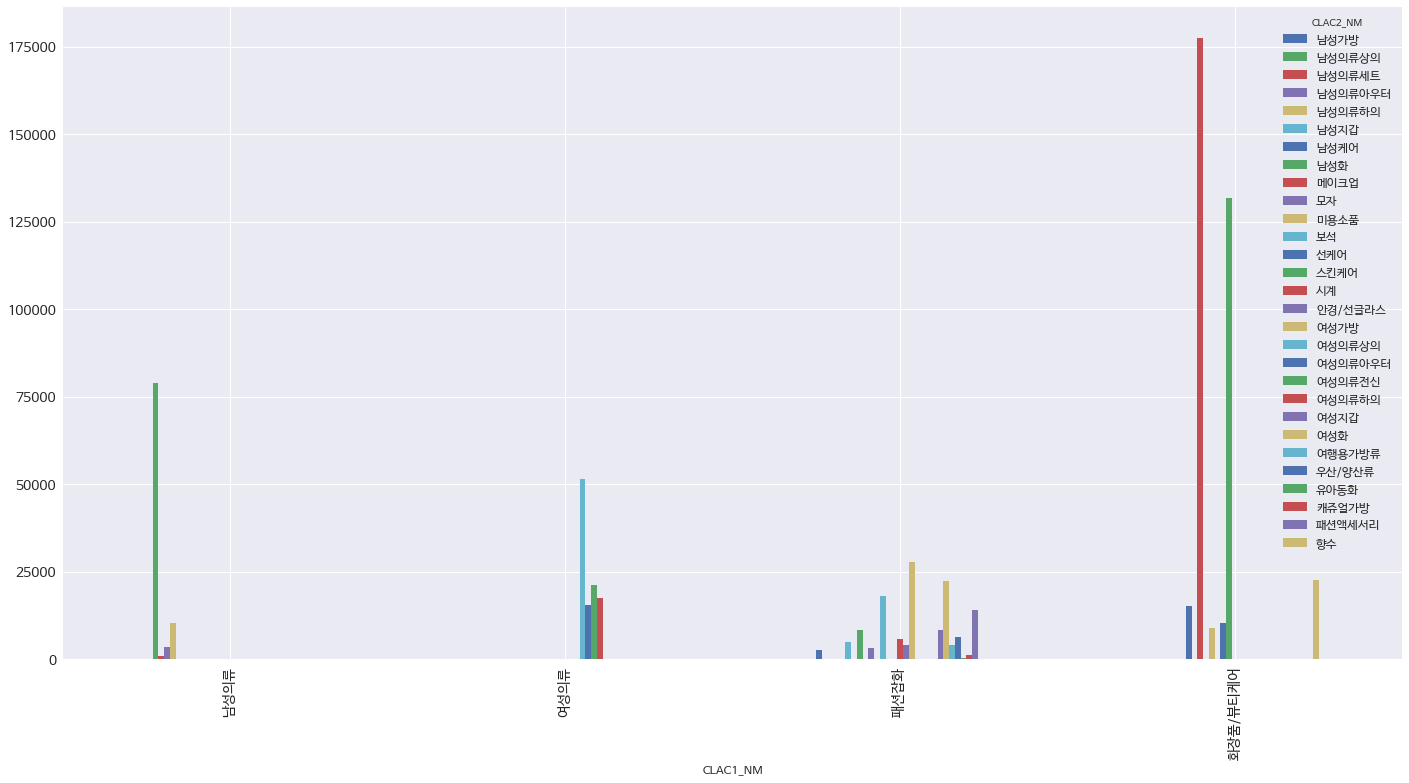

In [0]:
prod_mast.groupby(['CLAC1_NM','CLAC2_NM'])['PD_BUY_CT'].sum().unstack().plot(kind='bar',figsize = (24,12), fontsize=14)

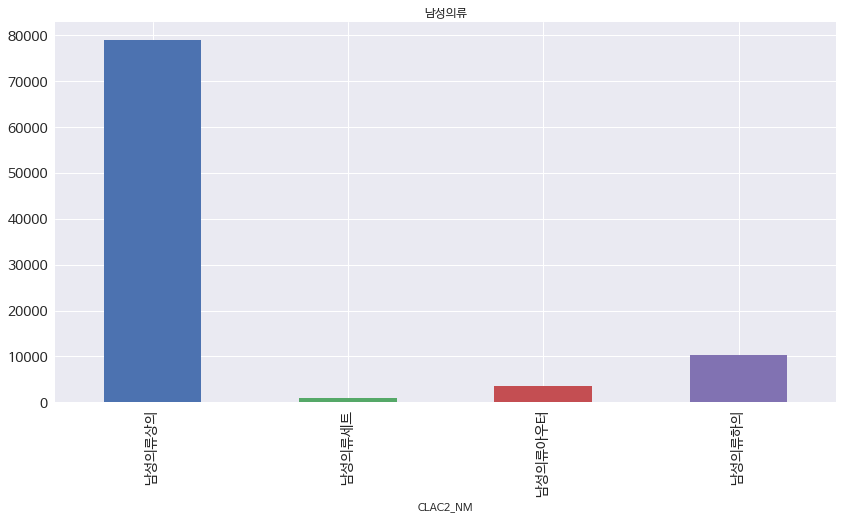

In [0]:
prod_mast[prod_mast['CLAC1_NM']=='남성의류'].groupby(['CLAC2_NM'])['PD_BUY_CT'].sum().plot(kind='bar',figsize = (14,7),title='남성의류', fontsize=14)

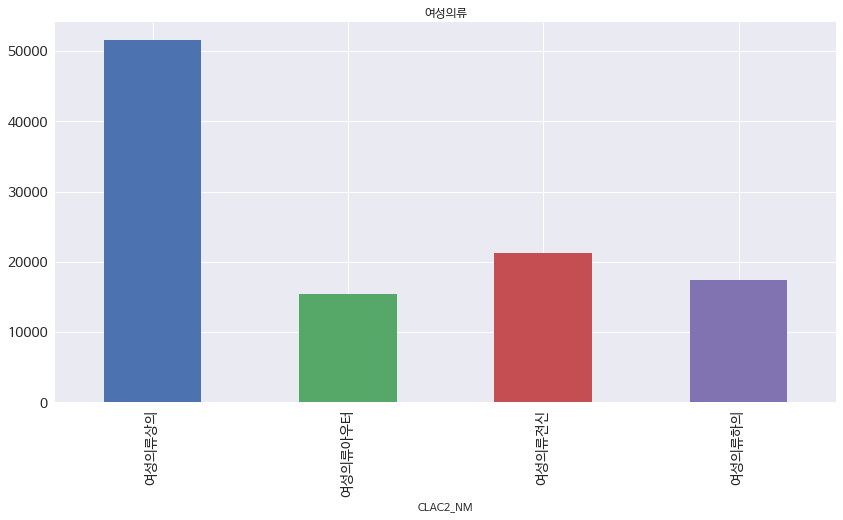

In [0]:
prod_mast[prod_mast['CLAC1_NM']=='여성의류'].groupby(['CLAC2_NM'])['PD_BUY_CT'].sum().plot(kind='bar',figsize = (14,7),title='여성의류', fontsize=14)

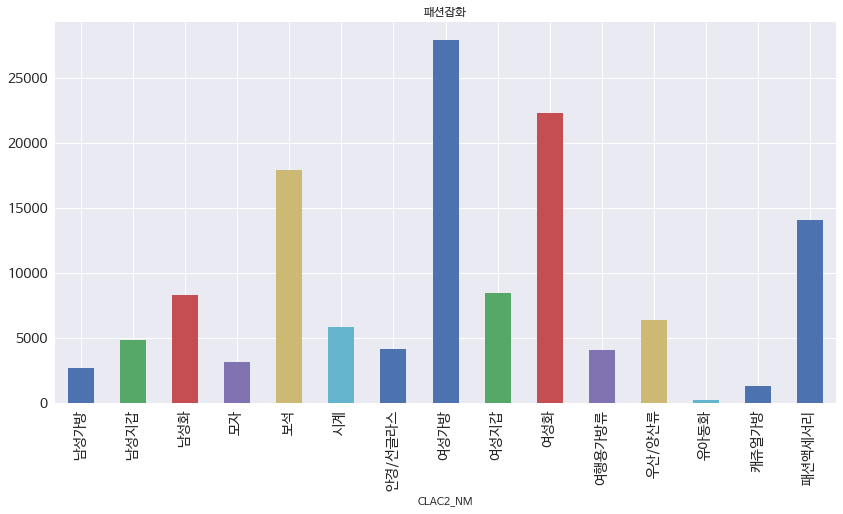

In [0]:
prod_mast[prod_mast['CLAC1_NM']=='패션잡화'].groupby(['CLAC2_NM'])['PD_BUY_CT'].sum().plot(kind='bar',figsize = (14,7),title='패션잡화',fontsize = 14)

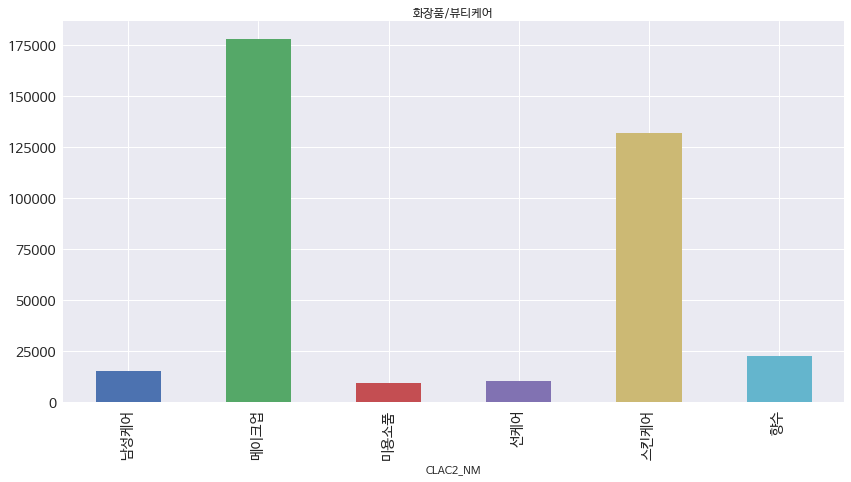

In [0]:
prod_mast[prod_mast['CLAC1_NM']=='화장품/뷰티케어'].groupby(['CLAC2_NM'])['PD_BUY_CT'].sum().plot(kind='bar',figsize = (14,7),title='화장품/뷰티케어', fontsize=14)

In [0]:
prod_mast.groupby(['CLAC1_NM'])['PD_BUY_CT'].sum().plot(kind='bar', fontsize=14)

### Q. 명품을 가장 많이 소비하는 소비층은?


In [0]:
pmc = pmc.fillna('비회원')

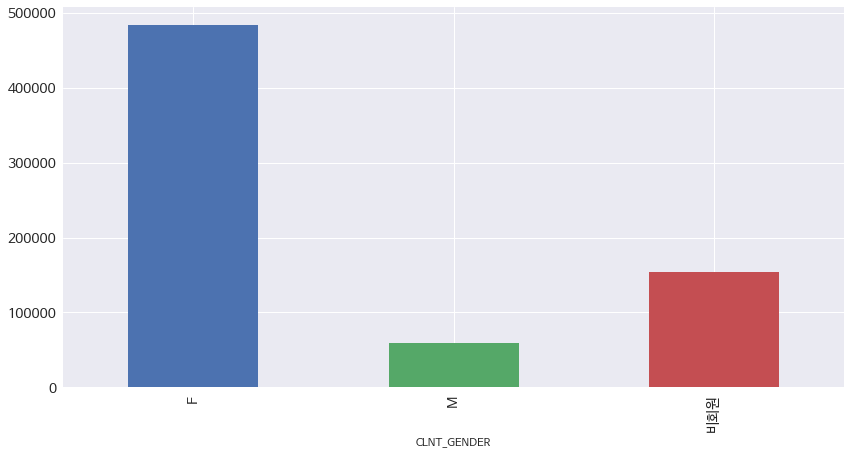

In [0]:
pmc.groupby(['CLNT_GENDER'])['PD_BUY_CT'].sum().plot(kind='bar',figsize = (14,7), fontsize=14)

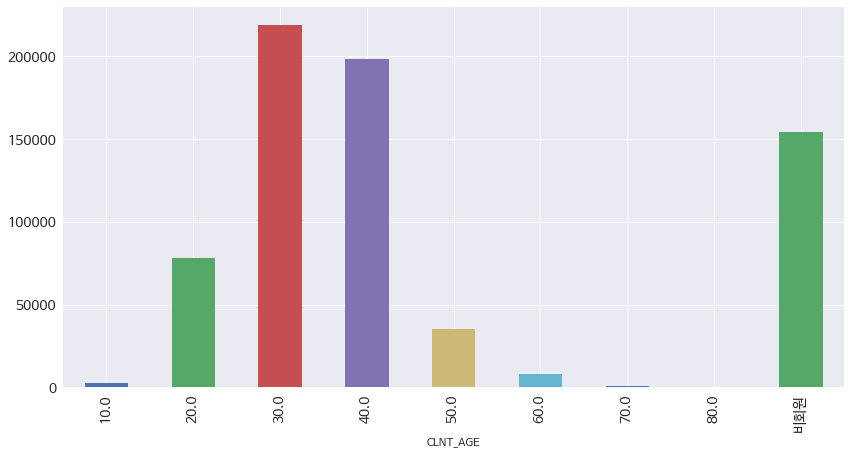

In [0]:
pmc.groupby(['CLNT_AGE'])['PD_BUY_CT'].sum().plot(kind='bar',figsize = (14,7), fontsize=14)

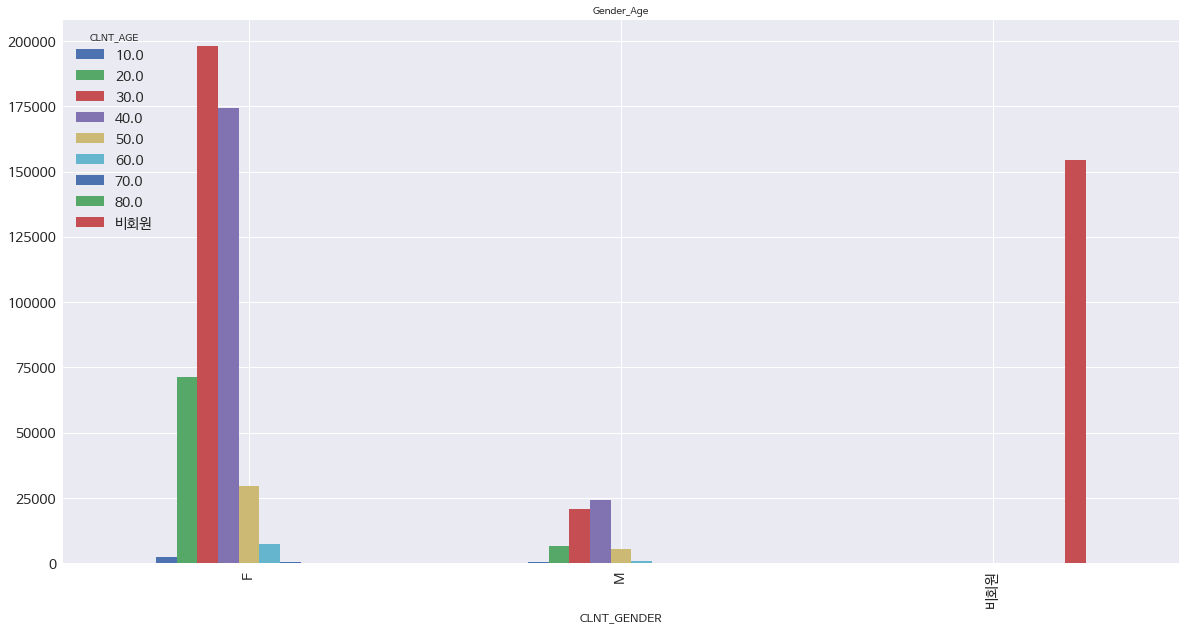

In [0]:
pmc.groupby(['CLNT_GENDER','CLNT_AGE'])['PD_BUY_CT'].sum().unstack().plot(kind='bar',figsize = (20,10),title='Gender_Age', fontsize=14)

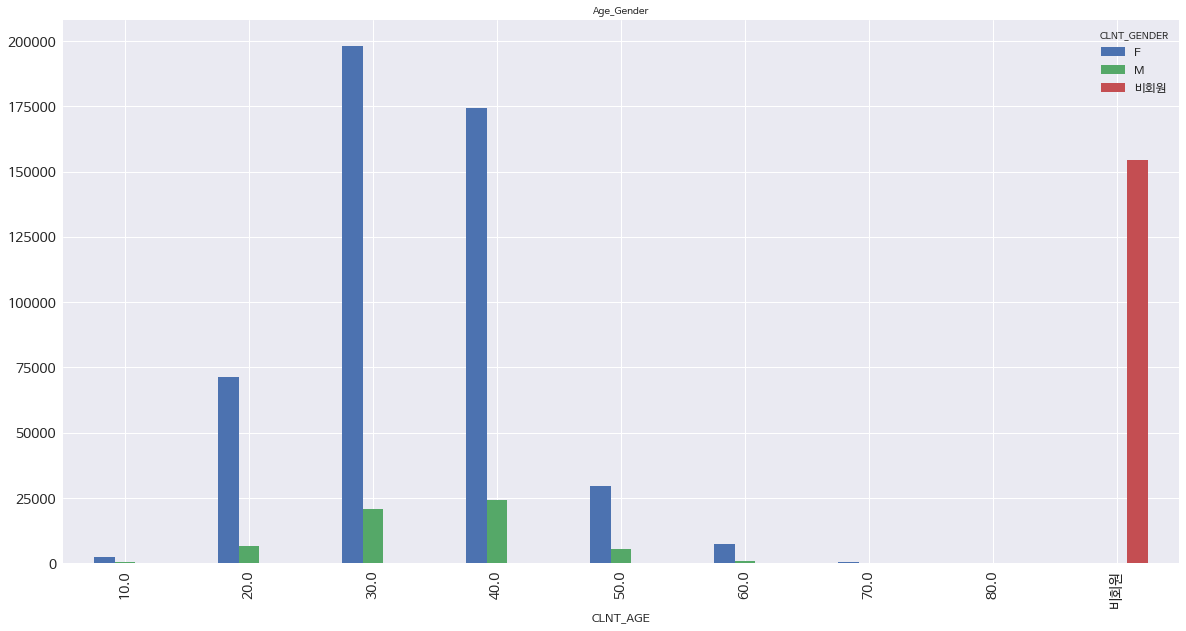

In [0]:
pmc.groupby(['CLNT_AGE','CLNT_GENDER'])['PD_BUY_CT'].sum().unstack().plot(kind='bar',figsize = (20,10),title = 'Age_Gender', fontsize=14)

#### 성별/ 연령별로도 알아보자


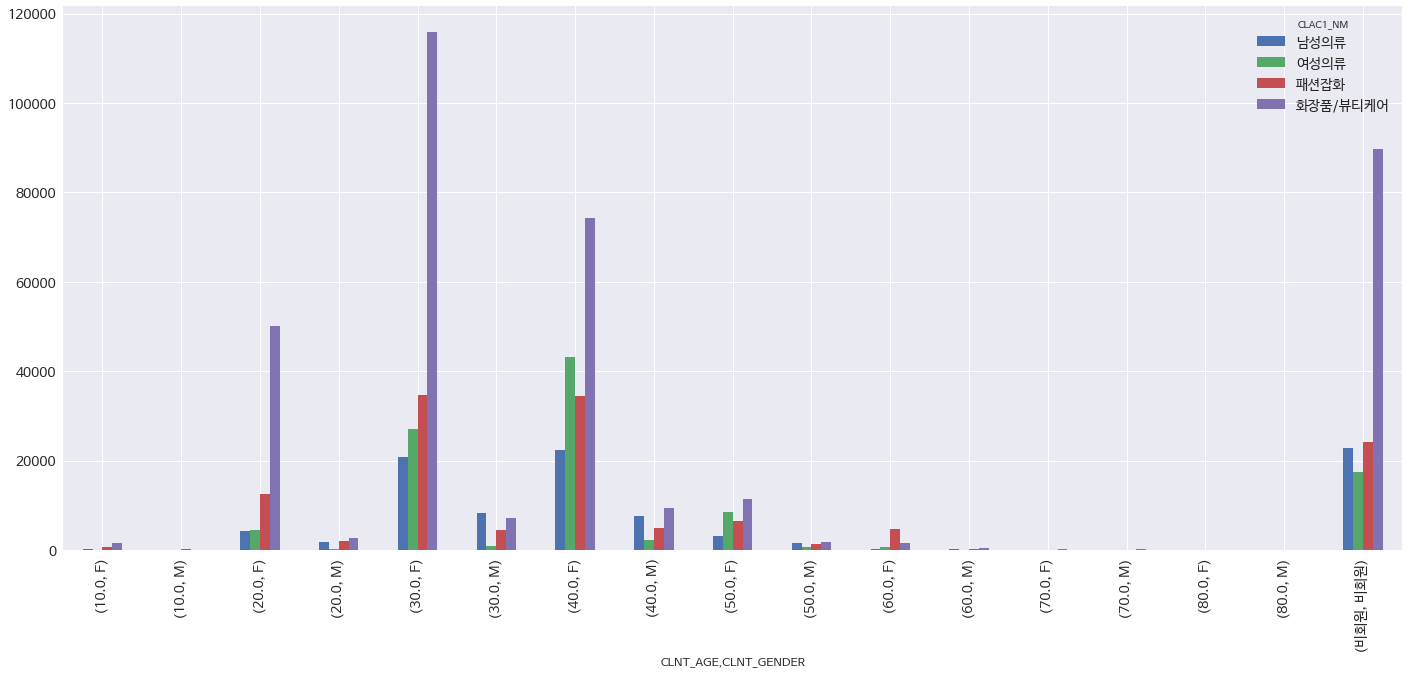

In [0]:
pmc.groupby(['CLNT_AGE','CLNT_GENDER','CLAC1_NM'])['PD_BUY_CT'].sum().unstack().plot(kind='bar',figsize=(24,10),title = '', fontsize=14)

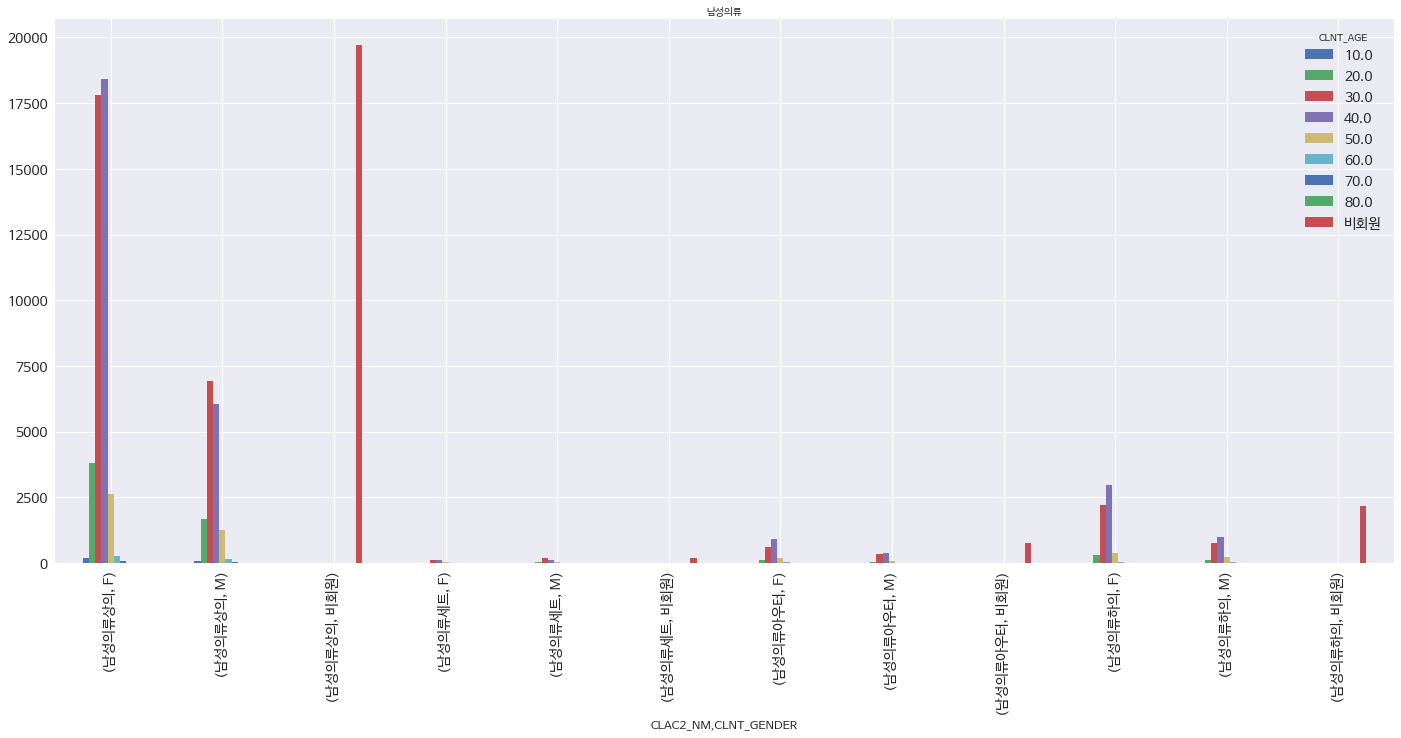

In [0]:
pmc[pmc['CLAC1_NM']=='남성의류'].groupby(['CLAC2_NM','CLNT_GENDER','CLNT_AGE'])['PD_BUY_CT'].sum().unstack().plot(kind='bar',figsize=(24,10),title = '남성의류', fontsize=14)

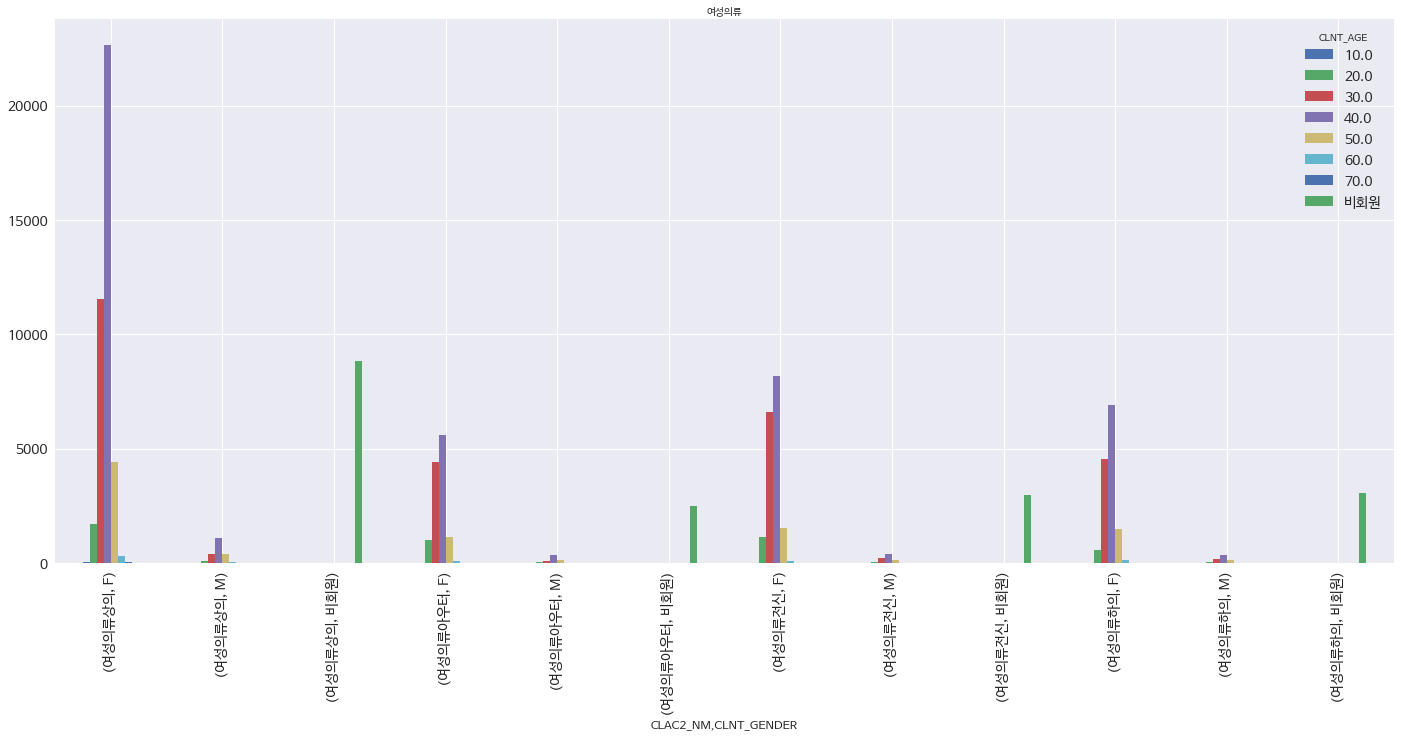

In [0]:
pmc[pmc['CLAC1_NM']=='여성의류'].groupby(['CLAC2_NM','CLNT_GENDER','CLNT_AGE'])['PD_BUY_CT'].sum().unstack().plot(kind='bar',figsize=(24,10),title = '여성의류', fontsize=14)

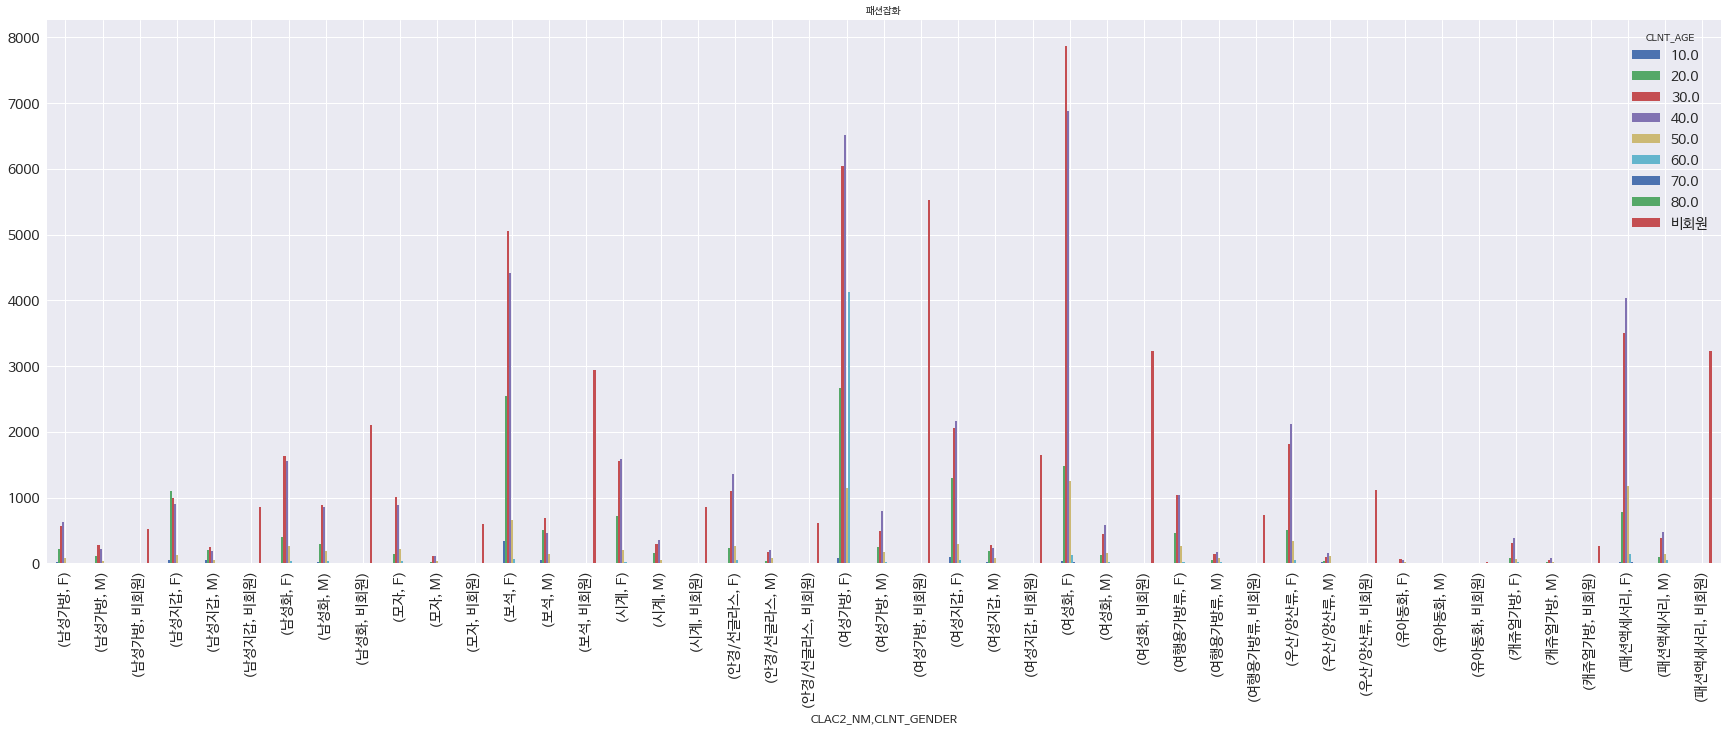

In [0]:
pmc[pmc['CLAC1_NM']=='패션잡화'].groupby(['CLAC2_NM','CLNT_GENDER','CLNT_AGE'])['PD_BUY_CT'].sum().unstack().plot(kind='bar',figsize=(30,10),title = '패션잡화', fontsize=14)

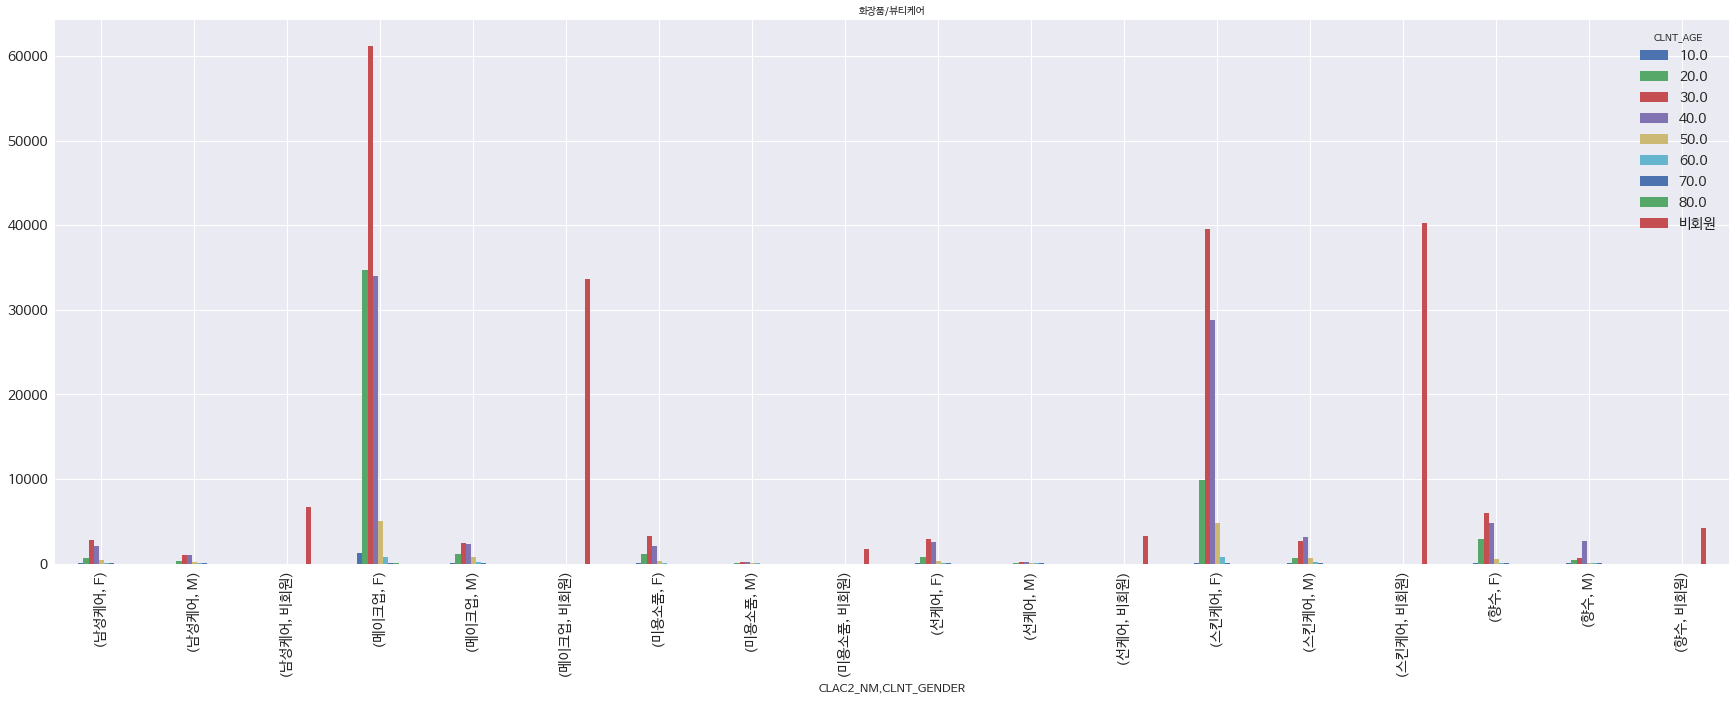

In [0]:
pmc[pmc['CLAC1_NM']=='화장품/뷰티케어'].groupby(['CLAC2_NM','CLNT_GENDER','CLNT_AGE'])['PD_BUY_CT'].sum().unstack().plot(kind='bar',figsize=(30,10),title = '화장품/뷰티케어', fontsize=14)

### Q. 어느 지역에서 얼마나 소비했을까?

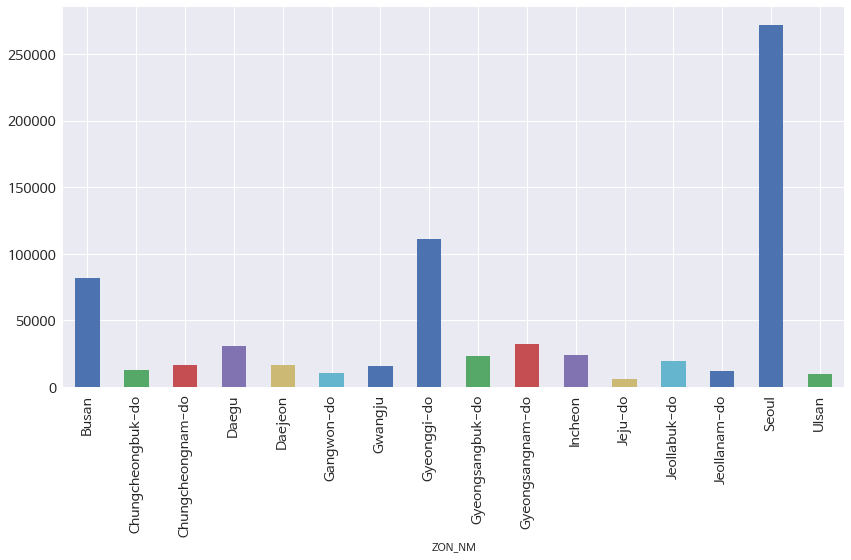

In [0]:
pms.groupby(['ZON_NM'])['PD_BUY_CT'].sum().plot(kind='bar',figsize = (14,7), fontsize=14)

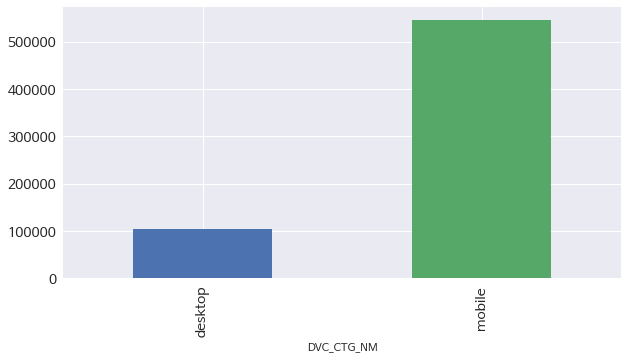

In [0]:
pms.loc[pms['DVC_CTG_NM'] == 'tablet','DVC_CTG_NM'] = 'mobile'
df_pms_d = pms.groupby(['DVC_CTG_NM'])['CLNT_ID'].count().plot(kind='bar',figsize = (10,5), fontsize=14)

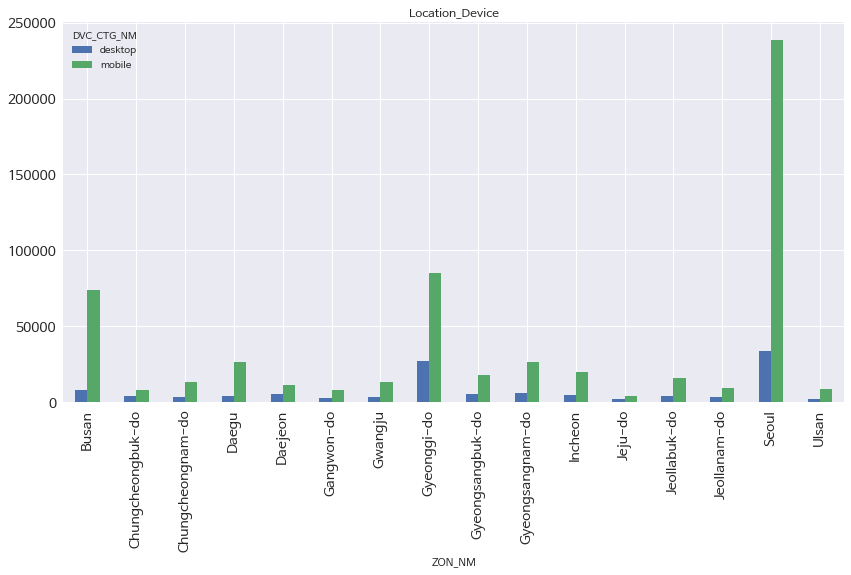

In [0]:
pms.groupby(['ZON_NM','DVC_CTG_NM'])['PD_BUY_CT'].sum().unstack().plot(kind='bar',figsize = (14,7), title = 'Location_Device', fontsize=14)